# HW5: Q2/Practical (40 points)
## **Exploration in Meta-Reinforcement Learning**


In [18]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
%cd /content/drive/MyDrive/MSC1400_1/AML/HW5/Practical/P2/starter
!pip install -r requirements.txt

/content/drive/.shortcut-targets-by-id/1jVF0l3bytDY-MS-KhOIIc2p9Lv67nImE/MSC1400_1/AML/HW5/Practical/P2/starter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Introduction

We consider a grid world illustrated in Figure 1. From a high level, the agent is given
a goal each episode and must reach it in as
few steps as possible. To quickly get to the
goal, the agent may ride a bus. This brings
the agent to the destination of that bus,
which is the other bus of the same color. In
potential goal
agent
bus
map
different tasks, the buses in the corners permute, while the buses in the center remain
fixed. For example, in the left task in Figure 1, the center blue bus’s destination is corresponding to different permutations of
Note that the goal is not part of the task, the buses in the corners.
and all four corners are potential goals in all tasks. There is also a map at a fixed location
in all of the tasks, which tells the agent the destination of each bus, when visited.

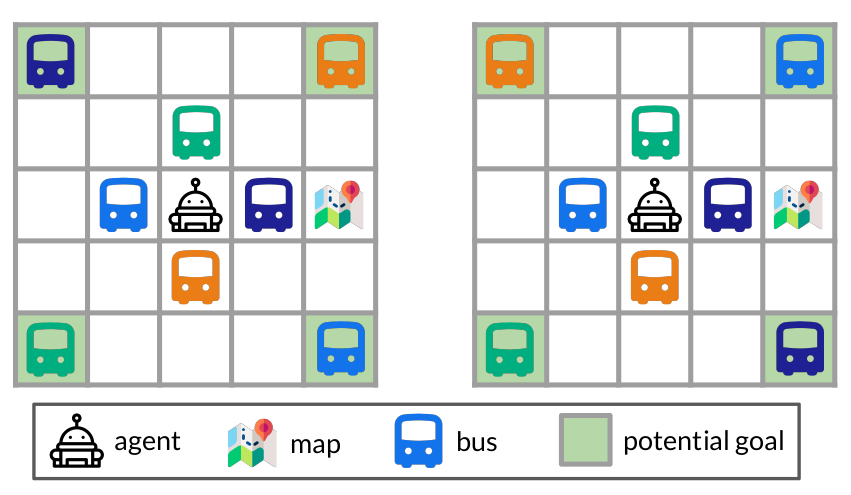



> *Figure 1: Two example tasks in the grid
the bottom right corner, while in the right world domain. There are 4! different tasks,
task, its destination is the top right corner.*

More concretely, the state consists of 4 components:
+ The agent’s $(x, y)$-position in the grid
+ A one-hot indicator of the object at the agent’s current position (none, bus, map).
+ A one-hot goal g corresponding to one of the four possible goal locations in the cor-
ners (shown in green).
+ A one-hot that is equal to the problem ID μ (defined below) if the agent is standing on
the map, and 0 otherwise. Standing on the map effectively encodes the destination
of each bus.

The agent begins every episode at the center of the grid, as in Figure 1. During an episode,
the goal is held fixed, while it is re-sampled uniformly across the 4 potential goal locations
in each new episode.

At each timestep, the agent can take one of 5 actions:
+ Move one cell up, down, left or right.
+ Ride the bus that the agent is currently on. This teleports the agent to the other bus
of the same color.

The agent receives +1 reward for reaching the correct goal position. The agent receives
−0.3 reward at each timestep it is not at the correct goal, incentivizing it to reach the goal as quickly as possible. The episode ends if either the agent goes to any goal location (correct
or incorrect) or if 20 timesteps have passed.
Each task is associated with a problem ID $\mu$. The only thing that changes between tasks
is the bus destinations: i.e., which colored bus appears in which outer corner. Therefore,
there are 4! = 24 different tasks. These tasks are uniformly sampled during meta-training
and meta-testing.
Throughout the assignment, we consider the meta-RL setting with one exploration episode
and one exploitation episode. The objective is to maximize the returns achieved in the ex-
ploitation episode, which we refer to as the exploitation returns. Note that the returns
achieved in the exploration episode do not matter. During the exploitation episode, the
agent is allowed to condition on the exploration episode $\tau^{exp} = (s_0, a_0, r_0, ...)$.

**Questions: (6 points)**

> 1) What returns are achieved by only taking the move action to get to the goal, without
riding any buses: i.e., directly walking to the goal? (1 point)

> **Answer:**

> 2) If the bus destinations (i.e., the problem ID) were known, what is the optimal returns
that could be achieved in a single exploitation episode? Describe an exploitation
policy that achieves such returns given knowledge of the bus destinations. (2 point)

> **Answer:**

> 3) Describe the exploration policy that discovers all of the bus destinations within the
fewest number of timesteps. (1 point)

> **Answer:**

> 4) Given your answers in b) and c), what is the optimal exploitation returns achievable
by a meta-RL agent? (2 point)

> **Answer:**

## RL$^2$
In this problem, we’ll analyze the performance of end-to-end meta-RL algorithms on the
grid world. To do this, start by running the RL 2 agent on the grid world navigation task
for 50, 000 trials by running the below command. This should take approximately 1 hour.

In [ ]:
!python3 rl2.py XYZ -b environment=\"map\" --steps 100000

{
    "agent": {
        "batch_size": 32,
        "buffer": {
            "max_buffer_size": 16000,
            "sequence_length": 50,
            "type": "sequential"
        },
        "learning_rate": 0.0001,
        "max_grad_norm": 10,
        "min_buffer_size": 800,
        "policy": {
            "discount": 0.99,
            "embedder": {
                "embed_dim": 64,
                "experience_embedder": {
                    "action_embed_dim": 16,
                    "done_embed_dim": 16,
                    "embed_dim": 64,
                    "instruction_embed_dim": 64,
                    "reward_embed_dim": 16,
                    "state_embed_dim": 64
                },
                "type": "recurrent"
            },
            "epsilon_schedule": {
                "begin": 1.0,
                "end": 0.01,
                "total_steps": 100000
            },
            "test_epsilon": 0,
            "type": "recurrent"
        },
        "sync_target_freq": 

This will create a directory experiments/rl2, which will contain:

+ A tensorboard subdirectory at experiments/rl2/tensorboard, which logs statistics, such as accumulated returns vs. number of training episodes, and also vs. number of training steps.
+ A visualization subdirectory at experiments/rl2/visualize, which will contain videos of the learned agent. Notice that:
 - The agent is rendered as a red square.
 - The grid cells that the agent has visited in the episode are rendered as small origin squares.
 - There are four pairs of buses, rendered as blue, pink, cyan, and yellow squares.
 - The map is rendered as a black square.
 - The goal state is rendered as a green square, which obscures one of the buses.
+ A checkpoints subdirectory at experiments/rl2/checkpoints, which will periodically save model checkpoints.
+ Metadata about the run, such as the configs used.



**Questions: (12 points)**
> 1) Examine the Tensorboard results under the tag reward/test in the experiments/rl2
directory. To 1 decimal place, what is the average meta-testing exploitation returns
RL 2 achieves after training? (2 point)

> **Answer:**


> 2) Examine the videos saved under experiments/rl2/visualize/36000/. Describe the
exploration and exploitation behaviors that RL 2 learns. (4 points).

> **Answer:**

> c) Does RL 2 achieve the optimal returns? Based on what you know about end-to-end
meta-RL, do these results align with your expectations? Why or why not? (6 points).

> **Answer:**

## DREAM

**First complete the methods specified with `TODO` comments in `embed.py` (20 points).** Then run the following command to test your implementation.

In [ ]:
!python3 dream.py dream -b environment=\"map\" --steps 100000

{
    "environment": "map",
    "exploration_agent": {
        "batch_size": 32,
        "buffer": {
            "max_buffer_size": 16000,
            "sequence_length": 50,
            "type": "sequential"
        },
        "learning_rate": 0.0001,
        "max_grad_norm": 10,
        "min_buffer_size": 2000,
        "policy": {
            "discount": 0.99,
            "embedder": {
                "embed_dim": 64,
                "experience_embedder": {
                    "action_embed_dim": 16,
                    "embed_dim": 64,
                    "state_embed_dim": 64
                },
                "type": "recurrent"
            },
            "epsilon_schedule": {
                "begin": 1.0,
                "end": 0.01,
                "total_steps": 50000
            },
            "test_epsilon": 0,
            "type": "recurrent"
        },
        "sync_target_freq": 2500,
        "type": "learned",
        "update_freq": 4
    },
    "instruction_agent": {
     

**Questions: (12 points)**

> 1) Submit the plot for test returns under the tag rewards/test from the experiments/dream
directory. Submit the plot under tensorboard/step, not the plot under tensorboard/episode.
If your implementation is correct, you should see improvement in the test return and after a while, its curve should begin to look different from RL 2 . (6 points)

> **Answer:** ...

> 2) Does Dream achieve optimal returns in your results from 1)? Based on what you
know about Dream, do these results align with your expectations? Why or why not?
(4 points)

> **Answer:**

> 3) Inspect the videos saved under experiments/dream/visualize/28000 or a later step
after Dream converges. Describe the exploration and exploitation behaviors that
Dream has learned. (2 point)

> **Answer:**

In [20]:
def visualize_tensorboard_results(tf_event_file,exp=True):
    plt.style.use('ggplot')
    figure(figsize=(10, 8), dpi=80)
    TAG_NAME = "reward/test"
    y = []
    x = []
    j = 0
    for it in tf.compat.v1.train.summary_iterator(tf_event_file):
        for val in it.summary.value:
            if exp:
              if val.tag == "steps/exploitation":
                  j=(val.simple_value)
            else:
              if val.tag == "steps/total":
                  j=(val.simple_value)
            if val.tag == TAG_NAME:
                  x.append(j)
                  y.append(val.simple_value)

    plt.plot(x,y)
    plt.grid()
    plt.show()


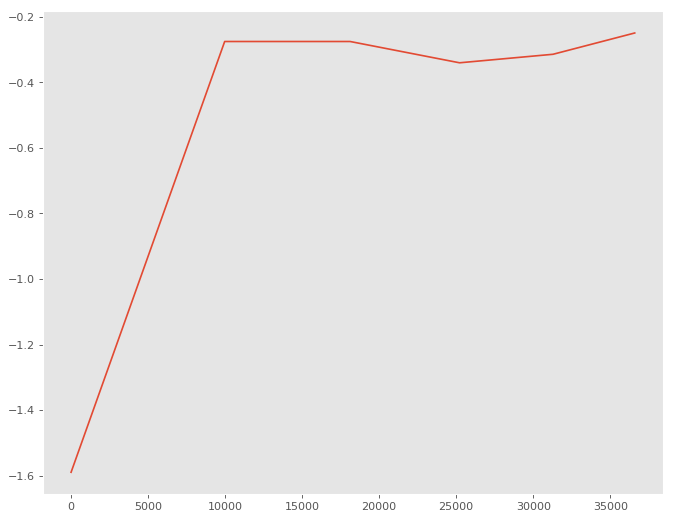

In [16]:
visualize_tensorboard_results('/content/drive/MyDrive/MSC1400_1/AML/HW5/Practical/P2/starter/experiments/dream/tensorboard/step/events.out.tfevents.1654429032.92af0181f127.853.1')

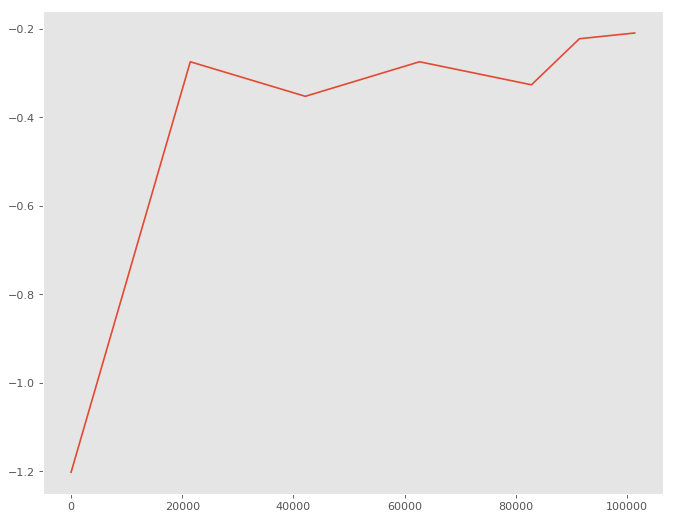

In [21]:
visualize_tensorboard_results('/content/drive/MyDrive/MSC1400_1/AML/HW5/Practical/P2/starter/experiments/XYZ/tensorboard/step/events.out.tfevents.1654425887.92af0181f127.583.1',False)